# Análise de marcas

Este notebook aplica as técnicas de extração e visualização, establecidas nos notebooks anteriores, para analisar aspectos dos refrigeradores das três marcas com mais produtos avaliados (vendidos) do conjunto de dados de análise.

In [1]:
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (20, 10)})

# 1. Carregando os dados

In [2]:
positives_df = pd.read_csv("../data/extreme_positive.csv").drop_duplicates("review_id")
negatives_df = pd.read_csv("../data/extreme_negative.csv").drop_duplicates("review_id")

# 2. Separando reviews das três marcas com mais avaliações

Pelas visualizações do primeiro notebook, temos que as marcas Whirlpool, General Electric e Frigidaire são as trẽs marcas com maior quantidade de avaliações. Sendo assim filtraremos, dos conjuntos de reviews positivas e negativas as reviews de produtos das respectivas marcas.

In [3]:
whirlpool_reviews = [
    positives_df[positives_df["brand"] == "Whirlpool"],
    negatives_df[negatives_df["brand"] == "Whirlpool"]
]

general_reviews = [
    positives_df[positives_df["brand"] == "General Electric"],
    negatives_df[negatives_df["brand"] == "General Electric"]
]

frigidaire_reviews = [
    positives_df[positives_df["brand"] == "Frigidaire"],
    negatives_df[negatives_df["brand"] == "Frigidaire"]
]

# 3. Preparando pipeline de extração de aspectos e visualizações

In [4]:
import json
with open("../data/ignore_words.json", "r") as f:
    ignore = json.load(f)

possible_subjects = ['it', 'refrigerator', 'fridge', 'freezer']
nlp = spacy.load("en_core_web_md")

def extract_and_visualize(df: pd.DataFrame, output_file: str, color_map: str) -> None:
    # Preprocessamento do texto
    processed_text = apply_text_processing_pipeline(df["review_body"])
    raw_text = "\n".join(df["review_body"].to_list())
    # Conversão para um Doc do spaCy
    output_doc = nlp(raw_text)
    # Extração de aspectos/fatos do Doc
    infos = get_statements(output_doc, possible_subjects)
    # Serialização dos aspectos extraidos
    serialize_statements(infos, output_file)
    # Visualização a partir de núvens de palavras
    statements = [info[2].text for info in infos]
    build_wordcloud("\n".join(statements), ignore, color_map=color_map)

# 4. Whirlpool

## 4.1 Reviews positivas

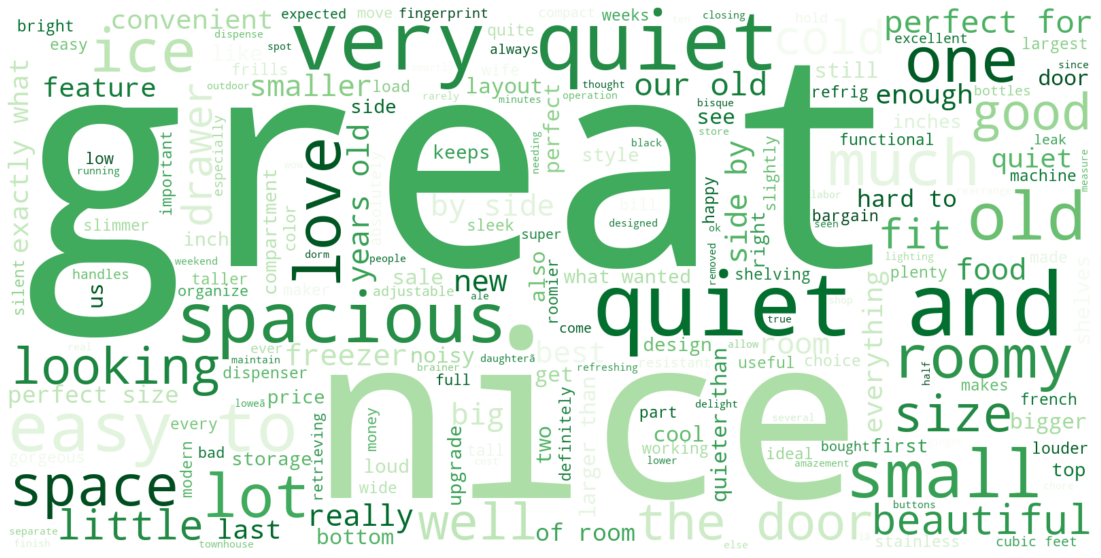

In [5]:
extract_and_visualize(whirlpool_reviews[0], "../extracted_infos/brand_analysis/whirpool_pos.json", "Greens")

## 4.2 Reviews negativas

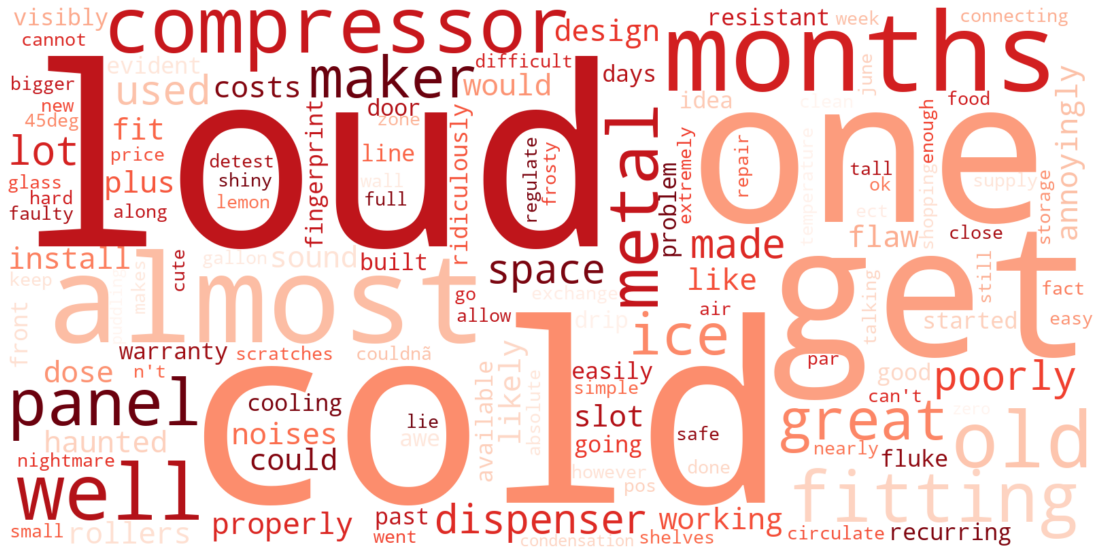

In [6]:
extract_and_visualize(whirlpool_reviews[1], "../extracted_infos/brand_analysis/whirpool_neg.json", "Reds")

# 5. General Electric

## 5.1 Reviews positivas

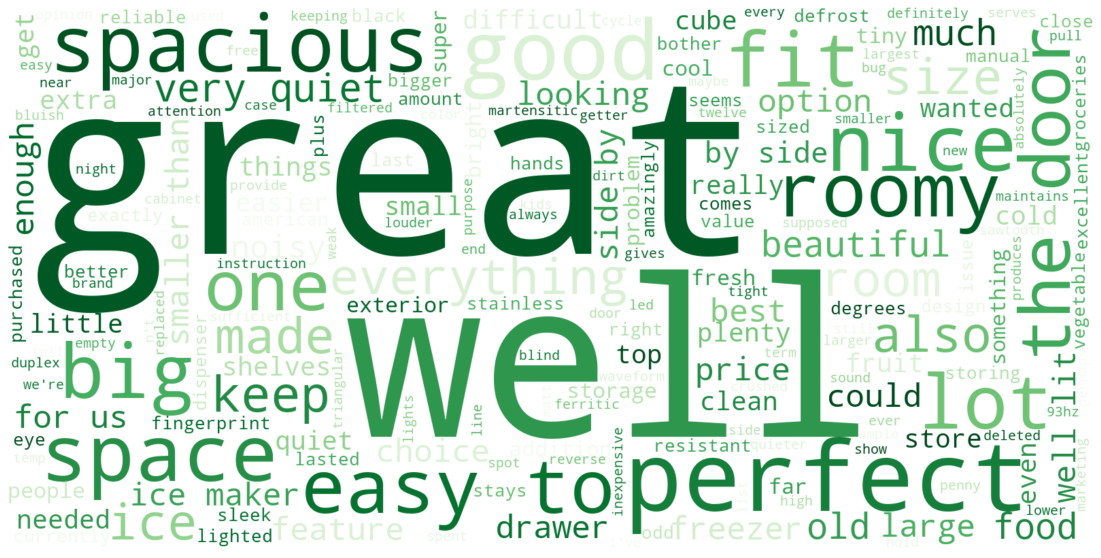

In [7]:
extract_and_visualize(general_reviews[0], "../extracted_infos/brand_analysis/general_electric_pos.json", "Greens")

## 5.2 Reviews negativas

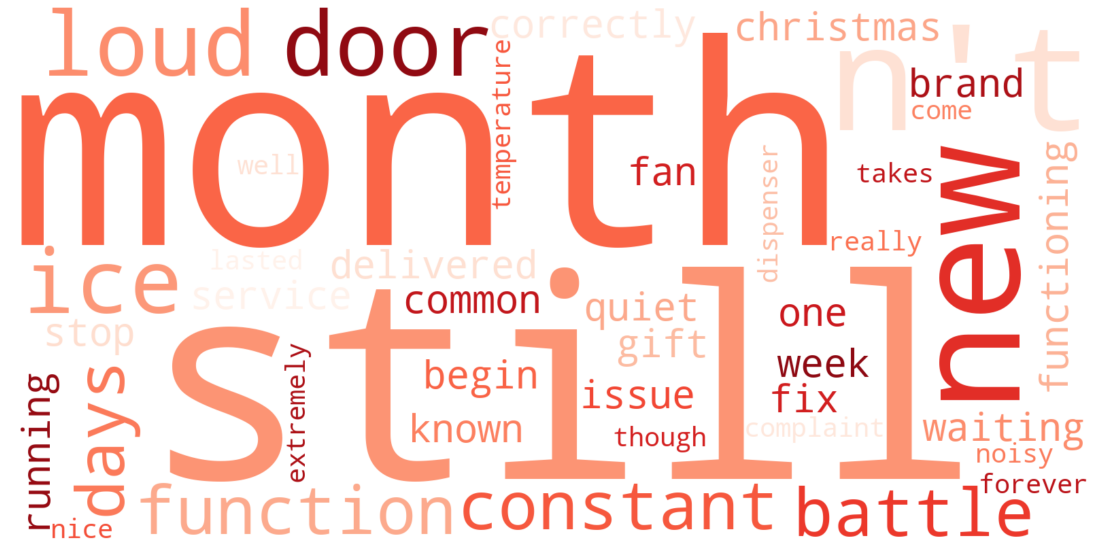

In [8]:
extract_and_visualize(general_reviews[1], "../extracted_infos/brand_analysis/general_electric_neg.json", "Reds")

# 6. Frigidaire

## 6.1 Reviews positivas

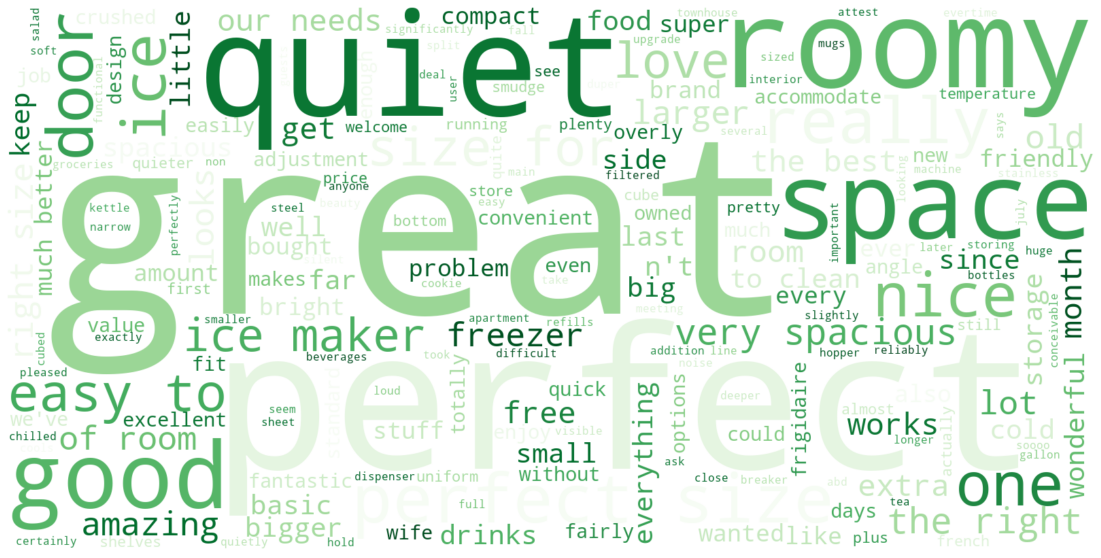

In [9]:
extract_and_visualize(frigidaire_reviews[0], "../extracted_infos/brand_analysis/frigidaire_pos.json", "Greens")

## 6.2 Reviews negativas

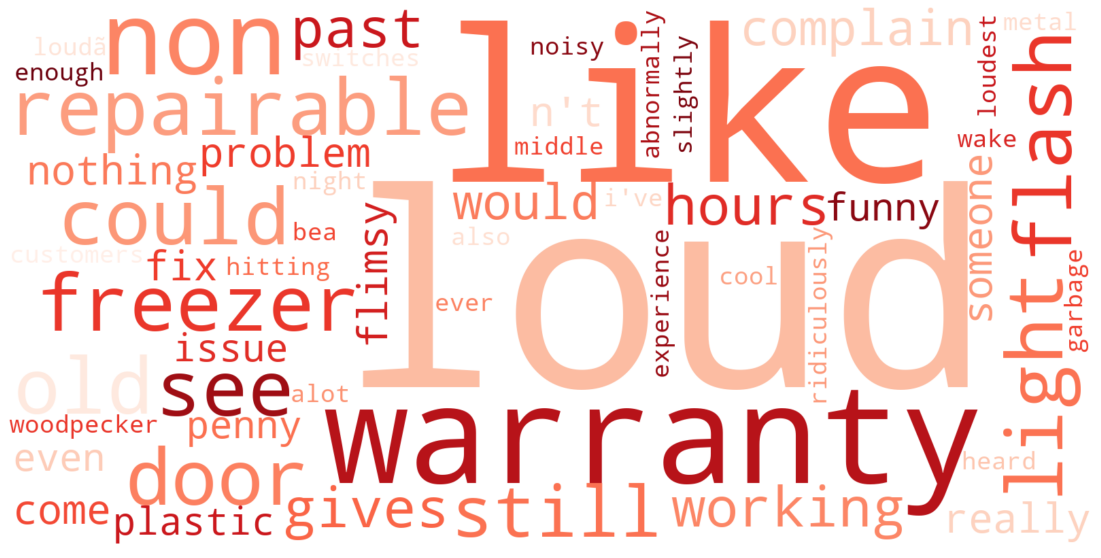

In [10]:
extract_and_visualize(frigidaire_reviews[1], "../extracted_infos/brand_analysis/frigidaire_neg.json", "Reds")